# Experiment - 11

### Exploratory Data Analysis on Iris Dataset


This is a very basic tutorial for exploratory data analyis and data visualization using the '[Iris Data Set](http://archive.ics.uci.edu/ml/datasets/iris)'

The Iris data set is best known database to be found in the pattern recognition literature. Before moving to machine learning for pattern learning, we will perform EDA and visualize the data set.

The data set consists of 150 observations with 4 features - Sepal length, Sepal width, Petal length and Petal width, of three different species - Setosa, Versicolar and Virginica.

We'll use two libraries for this tutorial: [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/devdocs/), [matplotlib](https://matplotlib.org/), and [seaborn](https://seaborn.pydata.org/).



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

%matplotlib inline



In [ ]:
iris = pd.read_csv('Iris.csv')
iris.shape

(150, 6)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This dataset has 4 numerical columns and one object column

In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


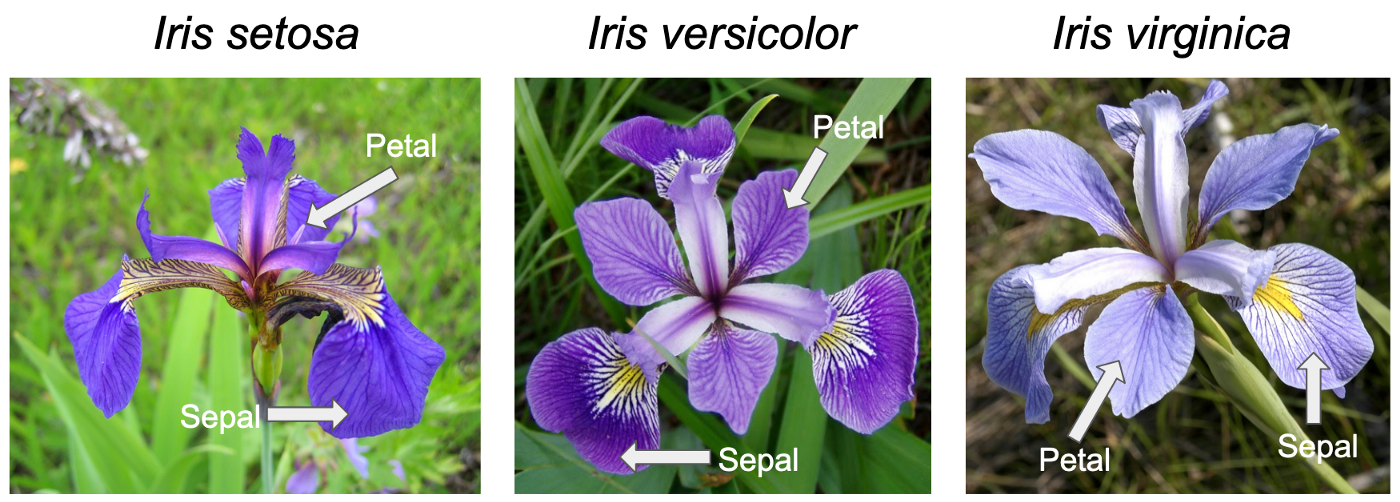

In [ ]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

your observation : 

In [ ]:
# Let's check if there in any inconsitency in the data set
iris = iris.drop('Id', axis=1)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

This is a balanced dataset.

### Visual Exploratory Data Analysis

#### Scatter Plots
Scatter plots use a collection of points placed using Cartesian coordinates to display values from two variables.

By displaying a variable in each axis, we can detect if a relationship or correlation between the two variables exists. Scatter Plots are also great for observing the spread of the data as they retain the exact data values and sample size.

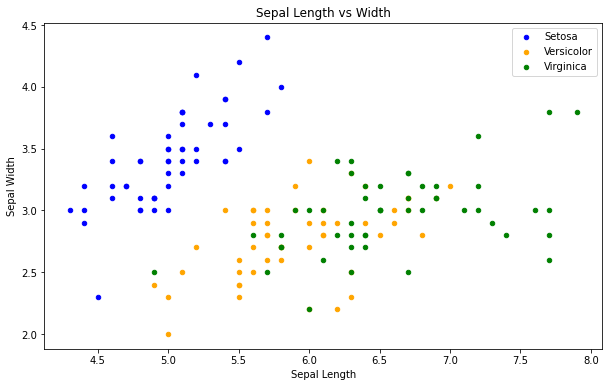

In [ ]:
# Let's plot a scatter plot of the Iris features
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Setosa',  figsize= (10,6))
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs Width")
plt.show()

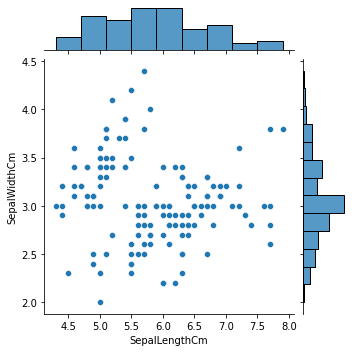

In [ ]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

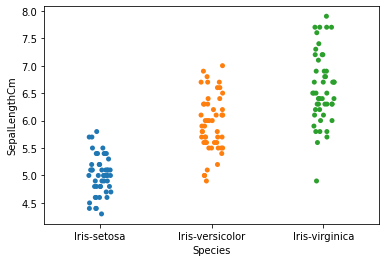

In [ ]:
# Sepal Length using a Strip plot
sns.stripplot(y ='SepalLengthCm', x = 'Species', data =iris)
plt.show()

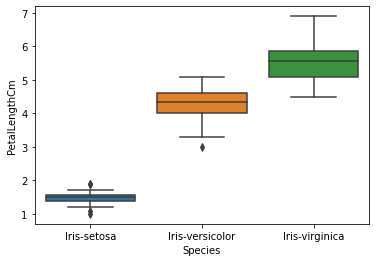

In [ ]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
plt.show()

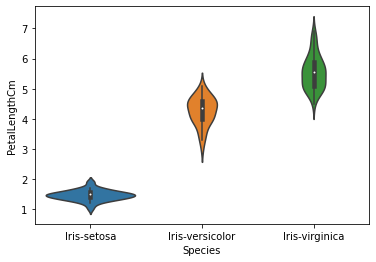

In [ ]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot

sns.violinplot(x="Species", y="PetalLengthCm", data=iris, size=6)
plt.show()

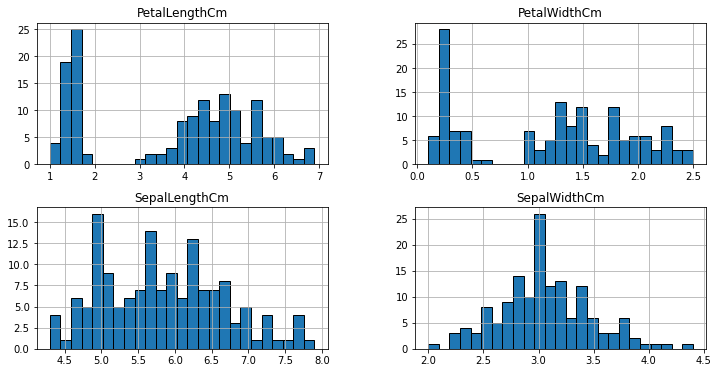

In [ ]:
# Let's see how are the length and width are distributed
iris.hist(edgecolor='black',bins = 25, figsize= (12,6))
plt.show()

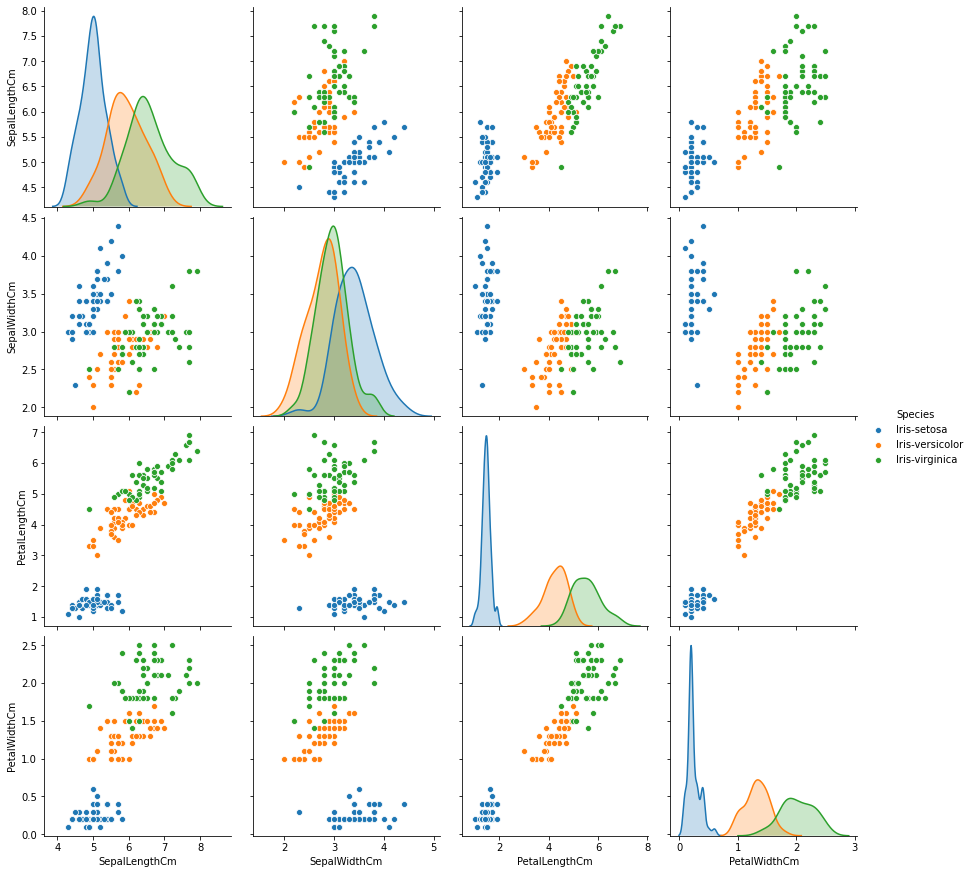

In [ ]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation between each pair of features

# From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations

sns.pairplot(data = iris, hue="Species", size=3)
plt.show()

**Heat Map** is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.This helps us to select the parmeters for machine learning.

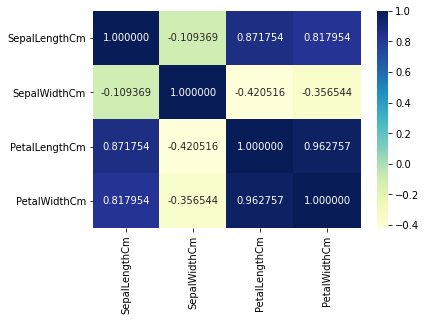

In [ ]:
# Plotting heat map
sns.heatmap(iris.corr(), cmap="YlGnBu", annot=True, fmt="f")
plt.show()

There is a high corelation between: Sepal Length & Petal Length, Sepal Length & Petal Width, and Petal Length & Petal Width. 

### Statistical Exploratory Data Analysis

In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Filtering by species
indices = iris['Species'] == 'Iris-setosa'
setosa = iris.loc[indices,:]
indices = iris['Species'] == 'Iris-versicolor'
versicolor = iris.loc[indices,:]
indices = iris['Species'] == 'Iris-virginica'
virginica = iris.loc[indices,:]

# Delete the species column from each dataframe as same species are present

del setosa['Species'], versicolor['Species'], virginica['Species']

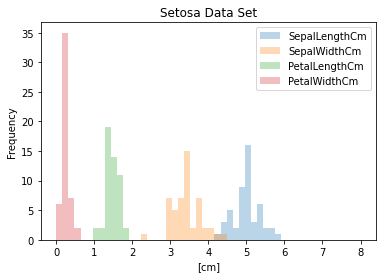

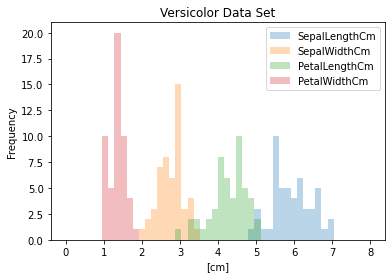

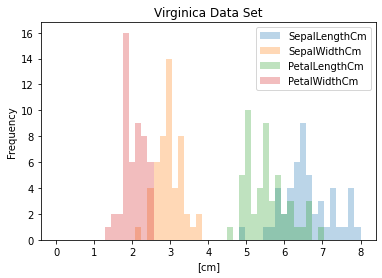

In [ ]:
# Visual EDA for individual species

setosa.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Setosa Data Set')
plt.xlabel('[cm]')

versicolor.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Versicolor Data Set')
plt.xlabel('[cm]')

virginica.plot(kind = 'hist', bins =50, range = (0,8), alpha = 0.3)
plt.title('Virginica Data Set')
plt.xlabel('[cm]')

plt.show()